In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [32]:
import tensorflow as tf
from random import randint

In [5]:
X_train = np.loadtxt('Dataset/input.csv',delimiter=',')
Y_train = np.loadtxt('Dataset/labels.csv',delimiter = ',')

X_test = np.loadtxt('Dataset/input_test.csv',delimiter=',')
Y_test = np.loadtxt('Dataset/labels_test.csv',delimiter=',')


In [6]:
X_train = X_train.reshape(len(X_train),100,100,3)
Y_train = Y_train.reshape(len(Y_train),1)
X_test = X_test.reshape(len(X_test),100,100,3)
Y_test = Y_test.reshape(len(Y_test),1)
X_train = X_train/255.0
X_test = X_test/255.0

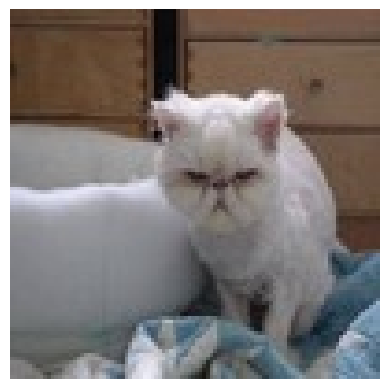

In [11]:
idx = randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.axis('off')
plt.show()

In [13]:
model = Sequential([
    Conv2D(32,(3,3) , activation = 'relu', input_shape = (100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1,activation='sigmoid')
    
])

In [14]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [17]:
model.fit(X_train,Y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.9163 - loss: 0.2608
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 87ms/step - accuracy: 0.9297 - loss: 0.2205
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.9327 - loss: 0.2067
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.9543 - loss: 0.1533
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 88ms/step - accuracy: 0.9715 - loss: 0.1087


In [18]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.7043 - loss: 0.9066


[0.8663324117660522, 0.6875]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


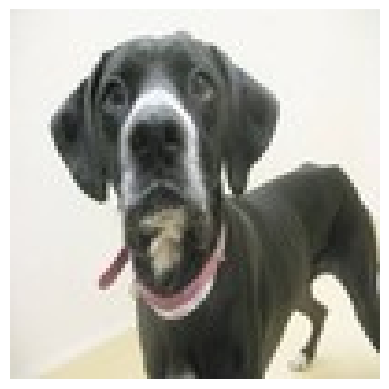

dog


In [31]:
idx = randint(0,len(X_test))
y = model.predict(X_test[idx,:].reshape(1,100,100,3))
plt.imshow(X_test[idx,:])
plt.axis('off')
plt.show()
if(y>0.5):
    print("cat")
else:
    print("dog")
